# CLT and Hypothesis testing
Name: Rusheel Chande

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

## 1. Is poverty in Azraq refugee camp falling?

### 1.1 Background

Q1.

In [2]:
p1 = 0.66
p2 = 0.51

The abject poverty in Azraq camp in Q1 of 2022 was 66% and 51% in Q2. 

Q2.

In [3]:
S = 325

325 households were surveyed from Azraq camp

### 1.2 Simulations

Q1.

In [4]:
np.random.seed(0)
sample = np.random.binomial(1, p2, size=S)

Q2.

In [5]:
sample.mean()

0.49846153846153846

The sample mean is 0.498 which is very close to p2 (0.51) and further from p1 which is 0.66. There's a difference of about 0.012 with the sample mean and p2 and a difference of 0.162 with p1

Q3.

In [6]:
R = 10000

R is 10,000

Q4.

In [7]:
np.random.seed(1)
means = np.empty(R)
for i in range(R):
    sample = np.random.binomial(1, p2, size=S)
    means[i] = sample.mean()

Q5.

In [8]:
means.mean()

0.5101381538461538

The average of averages is almost exactly 0.51. This resembles p2 (0.51), the abject poverty rate in Azraq camp in Q2 of 2022.

Q6.

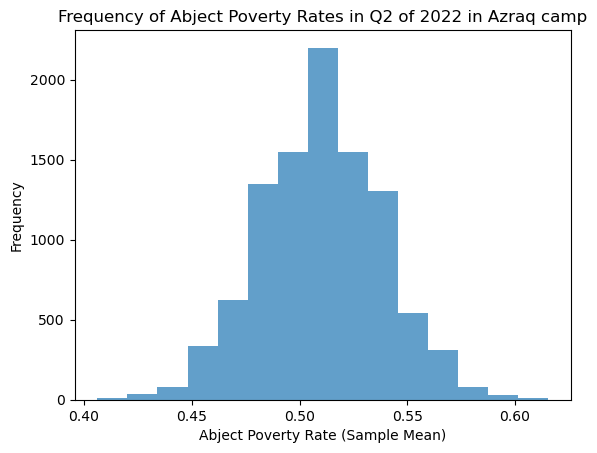

In [9]:
plt.hist(means, bins=15, alpha=0.7)
plt.title("Frequency of Abject Poverty Rates in Q2 of 2022 in Azraq camp")
plt.xlabel("Abject Poverty Rate (Sample Mean)")
plt.ylabel("Frequency")
plt.show()

The histogram of the averages resembles a normal distribution. From eyeballing the plot, the largest and smallest values that are "reasonably" common are 0.55 (largest) and 0.47 (smallest).

Q7.

In [10]:
np.percentile(means, 2.5), np.percentile(means, 97.5)

(0.4553846153846154, 0.5661538461538461)

The 95% confidence interval of the means of abject poverty rates in Q2 is (0.4553846153846154, 0.5661538461538461). Q1, which was 0.66 or 66% does not fall in this confidence interval as the maximum value of the interval is approximately 0.57 or 57%

### 1.3 Theoretical CI

Q1.

In [11]:
varX = 0.51 * (1 - 0.51)
varX

0.2499

In [12]:
sample.var() # sample I created in 1.2.1

0.24997869822485208

Q2.

The CLT says that the variance of the sample mean is the population variance divided by the sample size. As the sample size increases, the variance of the sample mean decreases, which results in the sample mean being more accurate of the population.

In [13]:
varSampleMean = varX / S
varSampleMean

0.000768923076923077

Q3.

In [14]:
stdSampleMean = np.sqrt(varSampleMean)
stdSampleMean

0.02772946225448804

The standard deviation of sample mean is 0.0277

Q4.

In [15]:
stdMeans = np.std(means)
stdMeans

0.02803481081899439

In [16]:
stdMeans - stdSampleMean

0.00030534856450634834

The standard deviation using this method was a little more than the method in Q4. However, the difference was very small as it was only 0.0003

Q5.

In [17]:
ciMeans = (p2 - 1.96 * stdMeans, p2 + 1.96 * stdMeans)
ciMeans

(0.455051770794771, 0.564948229205229)

This confidence interval is almost exactly the same to the one calculated in 1.2.7. p1 does not fall into this interval. p1 was 0.66 or 66% and it does not fall in this confidence interval as the maximum value of the interval is approximately 0.56 or 56%

Q6.

The 1.96 is the z-score which is the number of standard deviations away from the mean. And 1.96 standard deviations from the mean captures 95% of of values in normal distributions. The reason we can use this for this distribution is because the CLT says that the distribution of averages of a large number of independent variables will be approximately normal regardless of the shape of original distributions

### 1.4 Extra Credit Challenge

Q1.

In [18]:
starttime = time.time()
for i in range(R):
    np.random.binomial(1, p2, size=S)
    mean = sample.mean()
endtime = time.time()
simulationtime = endtime - starttime
simulationtime

0.17017292976379395

In [19]:
timefortrillion = (simulationtime / R) * (10 ** 12)
timefortrillion / (60 * 60 * 24)

196.95940944883557

It took 0.185 seconds to run 10,000 (R) simulations. It would take roughly 214 days to run a trillion simulations

Q2.

In [20]:
tVal = (p1 - p2) / stdSampleMean
tVal

5.409408903186443

The t-value for this difference is 5.4

Q3.

In [21]:
norm = stats.norm()
pVal = norm.cdf(-tVal)
pVal

3.161655253291475e-08

The example uses a negative 1.96 because they might have wanted the number on the left side of a distribution, and we use -tVal because we are interested in the probability of drawing a value greater than tVal, which is given by cdf(-tVal)

Q4.

In [22]:
iterations = 3 / pVal
iterations

94887005.68718927

I need 94887005.687 iterations

Q5.

In [23]:
timeneeded = (simulationtime / R) * iterations
timeneeded / (60 * 60)

0.4485333265084104

Yes, I could get it done by the deadline as it's less than an hour and it's currently 7/11

## 2. When will we hit 2C of global warming?

### 2.1 Load and check

Q1.

In [24]:
hadcrut = pd.read_csv("../data/hadcrut-5.0.1.0-annual.csv.bz2", sep=",")
hadcrut.head()

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


In [25]:
hadcrut.shape

(173, 4)

The loaded hadcrut data looks good

Q2.

In [26]:
hadcrut = hadcrut.rename({"Time":"year", "Anomaly (deg C)":"anomaly", "Lower confidence limit (2.5%)":"lower", "Upper confidence limit (97.5%)":"upper"}, axis=1)

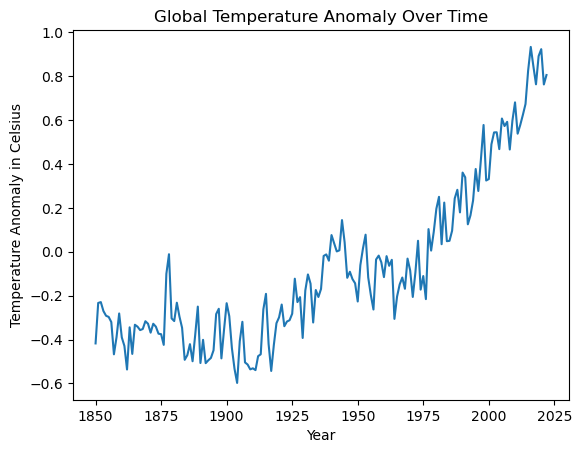

In [27]:
plt.plot(hadcrut.year, hadcrut.anomaly)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly in Celsius")
plt.title("Global Temperature Anomaly Over Time")
plt.show()

From the data it seems that before 1935 the temperature anomaly was under 0.0 and ranged between -0.6 and 0.0. After about 1935 the anomaly started approximately linearly increasing from 1935 to present from 0.0 to 0.9. This indicated global warming in temperatures

### 2.2 Baseline anomaly

Q1.

In [28]:
baselinedata = hadcrut[(hadcrut.year >= 1850) & (hadcrut.year <= 1900)]
baselinedata.year.min(), baselinedata.year.max()

(1850, 1900)

In [29]:
baselineAnomaly = baselinedata.anomaly.mean()
baselineAnomaly

-0.35650217072549023

The baseline anomaly is about -0.357

### 2.3 When will we hit 2C?

Q1.

In [30]:
recentdata = hadcrut[hadcrut.year >= 1963].copy()
recentdata.year.min(), recentdata.year.max()

(1963, 2022)

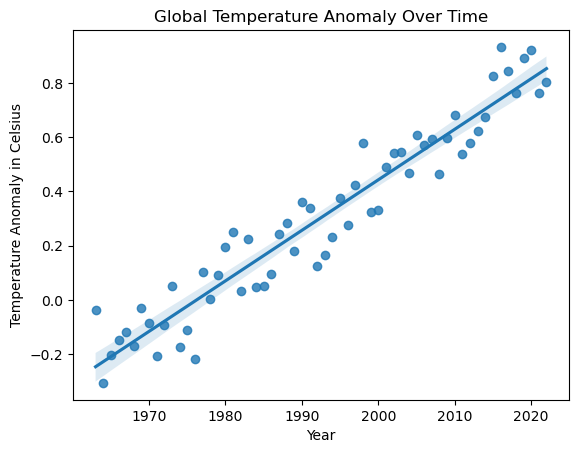

In [31]:
sns.regplot(x="year", y="anomaly", data=recentdata)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly in Celsius")
plt.title("Global Temperature Anomaly Over Time")
plt.show()

In my opinion, I think this regression line fits the data well

Q2.

In [37]:
recentdata["adjustedAnomaly"] = recentdata["anomaly"] + baselineAnomaly
recentdata.head()

,year,anomaly,lower,upper,adjustedAnomaly,yearAdjusted
113,1963,-0.036806,-0.090570,0.016958,-0.393308,-37
114,1964,-0.305867,-0.349492,-0.262241,-0.662369,-36
115,1965,-0.204388,-0.253574,-0.155202,-0.560890,-35
116,1966,-0.148885,-0.198392,-0.099377,-0.505387,-34
117,1967,-0.117516,-0.160625,-0.074408,-0.474018,-33


Q3.

In [38]:
recentdata["yearAdjusted"] = recentdata["year"] - 2000
m = smf.ols("adjustedAnomaly ~ yearAdjusted", data=recentdata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        adjustedAnomaly   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.80e-33
Time:                        06:38:01   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0866      0.014      6.353      0.000       0.059       0.114
yearAdjusted     0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared is 0.92 or 92%. This number tells us how good our model is to the data (how well our model fits the data)

Q4.

The intercept is 0.0866 which means the adjusted anomaly was 0.086 degrees Celsius above the baseline in the year 2000. The slope which is 0.0186 which means the annual increase in temperature anomaly above the pre-industrial baseline is 0.0186 degrees Celsius. Since the p-values for both are 0.00 which is below 0.05, they are statistically significant. This mean there is a significant positive relationship between the year and the adjusted anomaly, which points to a trend of global warming.

Q5.

(a) If we use the years as is the intercept would be for year 0 which isn't in the range of our data. It wouldn't make sense

(b) If we use years relative to 2000, it makes more sense as it's in range and 2000 is a good year for reference.

Yes the intercept is statistically significant because the p-value is 0. Which means it the temperature anomaly in the year 2000 was significantly different from zero

Q6.

In [60]:
aa2023 = 0.0186 * (2023 - 2000) + 0.0866
aa2023

0.5144

According to the model, the world now in 2023 is 0.5144 degrees Celsius above the pre-industrial baseline

Q7.

In [39]:
years = (1.5 - 0.0866) / 0.0186
years + 2000

2075.989247311828

In [40]:
years = (2 - 0.0866) / 0.0186
years + 2000

2102.8709677419356

I'm a little confused because these values are different from what the instructions are saying I should get. But accroding to this model, we will hit 1.5 Celsius in 2075 and 2 Celsius in 2103

Q8.

I think these thresholods will be crossed earlier because I think I messed up somewhere and got very late years. I think with the current rate of increase there is no stopping the threshold crossing. Humans will just have to innovate and adapt. It depends largely on human cooperation, earths natural warming and cooling cycles, and carbon emissions. To make the model better we could use a non linear model. 

I spend 4 hours on this assignment